# Analyse individual agent balance sheets JMAB

In [1]:
%matplotlib inline 
from pandas import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import style
import os

In [2]:
style.use('seaborn-whitegrid')
style.use('seaborn-colorblind')

In [3]:
#%cd C:/Users/joeri/workspace/interbank/data    
%cd D:/data

D:\data


In [5]:
def allRuns(generalFileName):
    """Combine all run files for a dataframe and return a dataframe"""
    listOfFiles= [x for x in os.listdir() if '.csv' in x]
    fileSeries = {}
    for file in listOfFiles:
        if (generalFileName in file) and (file.index(generalFileName) == 0):
            # read file 
            print(file)
            fileData = read_csv(file, header=None).drop(0, 1)
            # loop over columns 
            counter = 0
            for column in fileData:
                fileSeries[file[:-4] + '-{}'.format(counter)] = fileData[column]
                counter += 1
    return DataFrame(fileSeries)

In [6]:
def aggregateMicroData(df, nRuns):
    """return a dataframe with aggregate micro data given the number of simulations"""
    runs = [str(x+1) + '-' for x in range(nRuns)]
    runAndColumn = {}
    for run in runs:
        runAndColumn[run] = []
        for col in df.columns:
            if run in col:
                runAndColumn[run].append(col)
    sumPerRun = {}
    for key in runAndColumn:
        sumPerRun['agg-' + key] = df[runAndColumn[key]].sum(axis=1)
    return DataFrame(sumPerRun)

In [7]:
def averageMicroData(df, nRuns):
    """return a dataframe with average micro data given the number of simulations"""
    runs = [str(x+1) + '-' for x in range(nRuns)]
    runAndColumn = {}
    for run in runs:
        runAndColumn[run] = []
        for col in df.columns:
            if run in col:
                runAndColumn[run].append(col)
    sumPerRun = {}
    for key in runAndColumn:
        sumPerRun['agg-' + key] = df[runAndColumn[key]].mean(axis=1)
    return DataFrame(sumPerRun)

In [29]:
def renameBalanceSheetColumns(df):
    """takes an aggregated balance sheet dataFrame and names the columns with balance sheet items"""
    stocks = {'cash': 0, 'deposits': 1, 'consumer-goods': 2, 'capital-goods': 3, 
          'loans': 4, 'bonds': 5, 'reserves': 6, 'advances': 7, 'interbank': 8}
    colNames = df.columns.values
    newColNames = []
    for name in colNames:
        for stock in stocks:
            if ('-' + str(stocks[stock])) in name:
                newName = name[:-1] + stock
                newColNames.append(newName)
    df.columns = newColNames
    return(df)

In [54]:
START = 0
PERIODEND = 5

# 1 Aggregate dynamics

## 1.1 Unemployment

In [39]:
unemployment = read_csv('unemployment1.csv', header=None).drop(0, 1)
unemployment.rename(columns={1: 'Unempl'}, inplace=True)

In [40]:
bankruptcies = read_csv('cFirmsBankrupcty1.csv', header=None).drop(0,1)
bankruptcies.rename(columns={1:'bankr'}, inplace=True)

(0, 5)

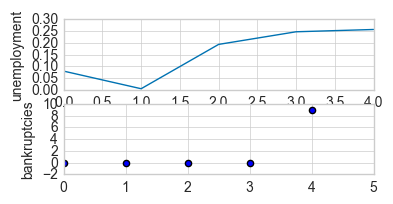

In [55]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(4,2))

ax1.plot(unemployment.index[START:PERIODEND], unemployment[START:PERIODEND])
ax1.set_ylabel('unemployment')
ax2.scatter(bankruptcies.index[START:PERIODEND], bankruptcies[START:PERIODEND])
ax2.set_ylabel('bankruptcies')
ax2.set_xlim(START, PERIODEND)

## 1.2 Inflation

In [42]:
cPrices = averageMicroData(allRuns('cFirmsPrices'),1)

cFirmsPrices1.csv


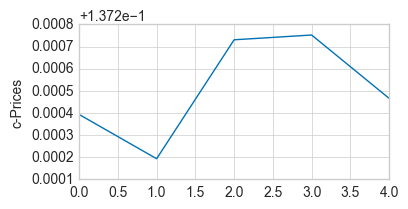

In [57]:
fig, ax1 = plt.subplots(1, 1, figsize=(4,2))

ax1.plot(cPrices.index[START:PERIODEND], cPrices[START:PERIODEND])
ax1.set_ylabel('c-Prices')

## 1.3 GDP and its components

In [44]:
GDP = read_csv('nominalGDP1.csv', header=None).drop(0, 1)
GDP.rename(columns={1: 'GDP'}, inplace=True)

In [45]:
nomInvestment = read_csv('nominalInvestment1.csv', header=None).drop(0, 1)
nomInvestment.rename(columns={1: 'nomInv'}, inplace=True)

In [46]:
nomCons = aggregateMicroData(allRuns('hhNominalConsumption'), 1)

hhNominalConsumption1.csv


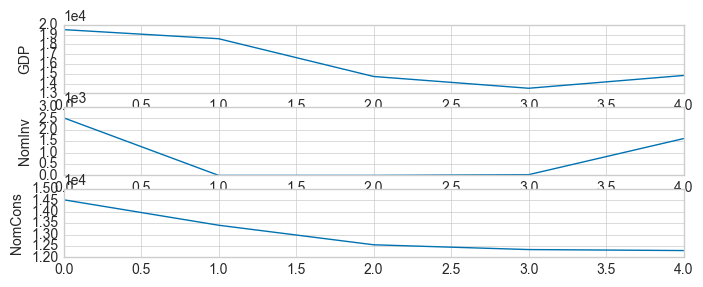

In [58]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8,3))

ax1.plot(GDP.index[START:PERIODEND], GDP[START:PERIODEND])
ax1.set_ylabel('GDP')
ax2.plot(nomInvestment.index[START:PERIODEND], nomInvestment[START:PERIODEND])
ax2.set_ylabel('NomInv')
ax3.plot(nomCons.index[START:PERIODEND], nomCons[START:PERIODEND])
ax3.set_ylabel('NomCons')

for ax in (ax1, ax2, ax3):
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

## 2 Households



In [48]:
hhAvNetIncome = read_csv('hhAvNetIncome1.csv', header=None).drop(0, 1)
hhAvNetIncome.rename(columns={1: 'hhAvNetIncome'}, inplace=True)
hhAvWage = read_csv('hhAvWage1.csv', header=None).drop(0, 1)
hhAvWage.rename(columns={1: 'hhAvWage'}, inplace=True)
hhRealDesiredConsumption = aggregateMicroData(allRuns('hhRealDesiredConsumption'),1)
hhRealConsumption = aggregateMicroData(allRuns('hhRealConsumption'),1)
cFirmOutput = aggregateMicroData(allRuns('cFirmsOutput'), 1)
hhTaxPayments = aggregateMicroData(allRuns('hhTaxes'), 1)

hhRealDesiredConsumption1.csv
hhRealConsumption1.csv
cFirmsOutput1.csv


In [60]:
hhRealDesiredConsumption.head()

,agg-1-
0,InfinityInfinityInfinityInfinityInfinityInfini...
1,24.23850958853856224.24871814046195712.4208511...
2,24.9116331786942624.92057202988950212.68914051...
3,25.05416960219254525.06082053273397412.9182780...
4,25.14890816174199625.1543233955386524.19312645...


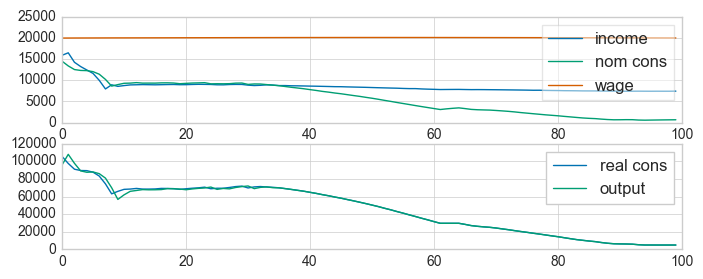

In [51]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,3))

ax1.plot(hhAvNetIncome.index[START:PERIODEND], hhAvNetIncome[START:PERIODEND] * 4000, label='income')
ax1.plot(nomCons.index[START:PERIODEND], nomCons[START:PERIODEND], label='nom cons')
ax1.plot(hhAvWage.index[START:PERIODEND], hhAvWage[START:PERIODEND] * 4000, label='wage')
#ax1.plot(hhTaxPayments.index[START:PERIODEND], hhTaxPayments[START:PERIODEND], label='tax payments')
ax1.legend(frameon=True, framealpha=0.5)
ax2.plot(hhRealConsumption.index[START:PERIODEND], hhRealConsumption[START:PERIODEND], label='real cons')
#ax2.plot(hhRealDesiredConsumption.index[START:PERIODEND], hhRealDesiredConsumption[START:PERIODEND], label='des real cons')
ax2.plot(cFirmOutput.index[START:PERIODEND], cFirmOutput[START:PERIODEND], label='output')
ax2.legend(frameon=True)

# 3 cFirms
## 3.1 Real investment demand

In [20]:
realInvDem = aggregateMicroData(allRuns('cFirmsRealDesiredInvestment'), 1)

cFirmsRealDesiredInvestment1.csv


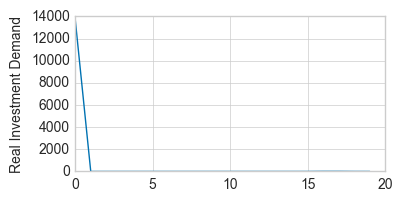

In [21]:
fig, ax1 = plt.subplots(1, 1, figsize=(4,2))

ax1.plot(realInvDem.index[START:PERIODEND], realInvDem[START:PERIODEND])
ax1.set_ylabel('Real Investment Demand')

## 3.2 Profits and capacity utilization

In [22]:
profits = aggregateMicroData(allRuns('cFirmsProfits'), 1)
capUtil = averageMicroData(allRuns('cFirmsCapacityUtilization'), 1)

cFirmsProfits1.csv
cFirmsCapacityUtilization1.csv


In [23]:
ocf = averageMicroData(allRuns('cFirmsOCF'), 1)

cFirmsOCF1.csv


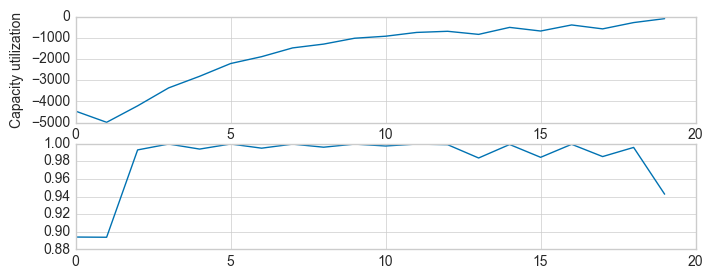

In [24]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,3))

ax1.plot(profits.index[START:PERIODEND], profits[START:PERIODEND])
ax1.set_ylabel('Profits')
ax2.plot(capUtil.index[START:PERIODEND], capUtil[START:PERIODEND])
ax1.set_ylabel('Capacity utilization')

## 3.3 cFirm Income & costs

In [25]:
prices = averageMicroData(allRuns('cFirmsPrices'), 1)
realSales = averageMicroData(allRuns('cFirmsRealSales'), 1)
nomSales = averageMicroData(allRuns('cFirmsNominalSales'), 1)
wages = averageMicroData(allRuns('cFirmsWageBill'), 1)
debtService = averageMicroData(allRuns('cFirmsDebtService'), 1)

cFirmsPrices1.csv
cFirmsRealSales1.csv
cFirmsNominalSales1.csv
cFirmsWageBill1.csv
cFirmsDebtService1.csv


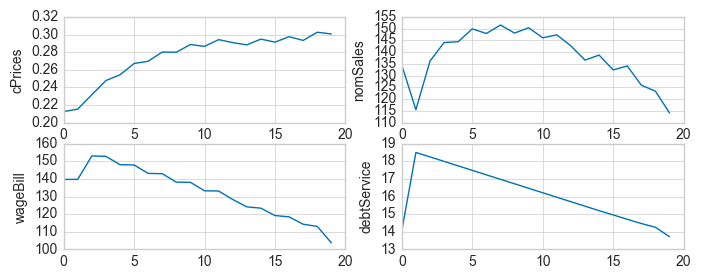

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,3))

ax1.plot(prices.index[START:PERIODEND], prices[START:PERIODEND])
ax1.set_ylabel('cPrices')
ax2.plot(nomSales.index[START:PERIODEND], nomSales[START:PERIODEND])
ax2.set_ylabel('nomSales')
ax3.plot(wages.index[START:PERIODEND], wages[START:PERIODEND])
ax3.set_ylabel('wageBill')
ax4.plot(debtService.index[START:PERIODEND], debtService[START:PERIODEND])
ax4.set_ylabel('debtService')

## 3.4 cGoods Market

In [30]:
cfBalanceSheets = renameBalanceSheetColumns(allRuns('aggCFBS'))
cfColumns = cfBalanceSheets.columns.values
cfConsGoods = cfBalanceSheets[[x for x in cfColumns if 'consumer-goods' in x]]

aggCFBS1.csv


In [37]:
changeInInventories = cfConsGoods.diff(periods=1, axis=0)
changeInInventories['aggCFBS1-consumer-goods'][0] = -9600

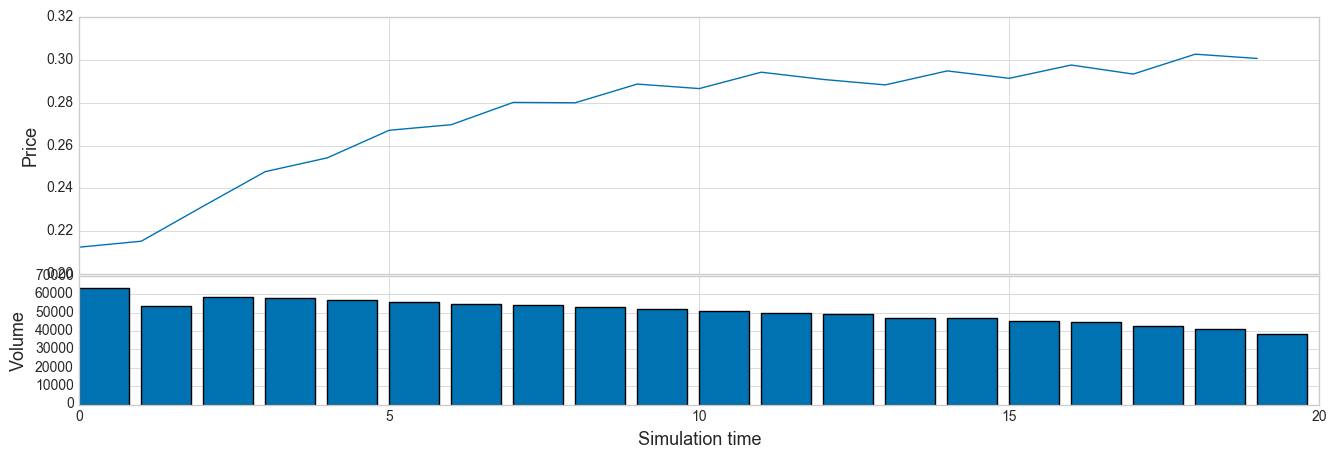

In [138]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,5), sharex=True, gridspec_kw={'height_ratios':[2,1]})

ax1.plot(cPrices.index[START:PERIODEND], cPrices[START:PERIODEND])

ax2.bar(hhRealConsumption.index[START:PERIODEND], hhRealConsumption[START:PERIODEND]['agg-1-'].apply(int))

ax2.set_xlabel('Simulation time', fontsize='13')    

ax1.set_ylabel('Price', fontsize='13')
ax2.set_ylabel('Volume', fontsize='13')
    
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
fig.subplots_adjust(hspace=0.01)

#ax1.legend(frameon=True, loc='best')

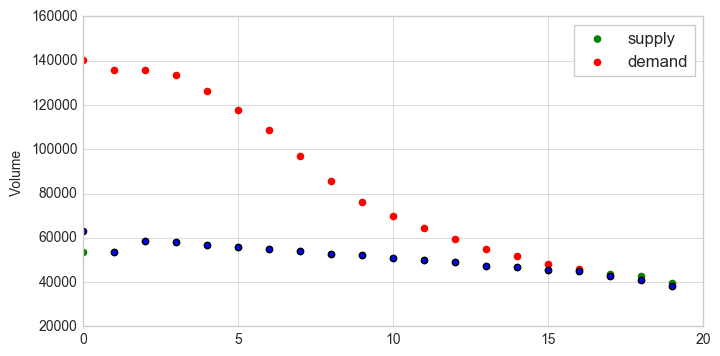

In [27]:
# demand: hhRealDesiredConsumption
# supply: cFirmOutput + (delta)inventories
fig, ax1 = plt.subplots(1, 1, figsize=(8,4))

ax1.set_ylabel('Volume')
ax1.set_xlim(START, PERIODEND)

ax1.scatter(cFirmOutput.index[START:PERIODEND], cFirmOutput[START:PERIODEND]['agg-1-'].apply(int), color='green', label='supply')
ax1.scatter(hhRealDesiredConsumption.index[START:PERIODEND], hhRealDesiredConsumption[START:PERIODEND]['agg-1-'].apply(int), color='red', label='demand')
#ax1.scatter(hhRealConsumption.index[START:PERIODEND], hhRealConsumption[START:PERIODEND])

ax1.legend(frameon=True, loc='best')

# 4 Capital firms

In [58]:
kPrices = averageMicroData(allRuns('kFirmsPrices'), 1)
kBankruptcies = read_csv('kFirmsBankrupcty1.csv', header=None).drop(0,1)
kBankruptcies.rename(columns={1:'bankr'}, inplace=True)
kRealSales = averageMicroData(allRuns('kFirmsRealSales'), 1)
kNomSales = averageMicroData(allRuns('kFirmsNominalSales'), 1)
kWages = averageMicroData(allRuns('kFirmsWageBill'), 1)
kDebtService = averageMicroData(allRuns('kFirmsDebtService'), 1)
kProfits = aggregateMicroData(allRuns('kFirmsProfits'), 1)
kFirmsDesiredOutput = averageMicroData(allRuns('kFirmsDesiredOutput'), 1)
kFirmOutput = aggregateMicroData(allRuns('kFirmsOutput'), 1)

**Interestingly, kFirms don't seem to go bankrupt even with sales collapsing. I suspect this is the case because they are able to fire all employees without going bankrupt??**

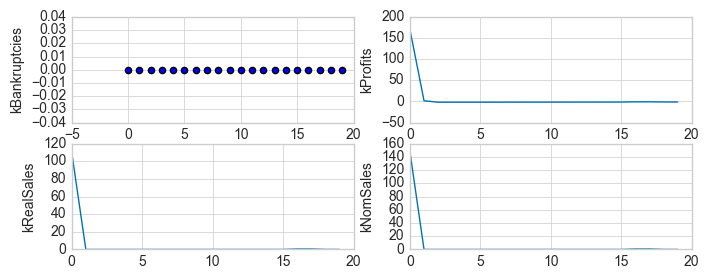

In [54]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,3))

ax1.scatter(kBankruptcies.index[START:PERIODEND], kBankruptcies[START:PERIODEND])
ax1.set_ylabel('kBankruptcies')
ax2.plot(kProfits.index[START:PERIODEND], kProfits[START:PERIODEND])
ax2.set_ylabel('kProfits')
ax3.plot(kRealSales.index[START:PERIODEND], kRealSales[START:PERIODEND])
ax3.set_ylabel('kRealSales')
ax4.plot(kNomSales.index[START:PERIODEND], kNomSales[START:PERIODEND])
ax4.set_ylabel('kNomSales')

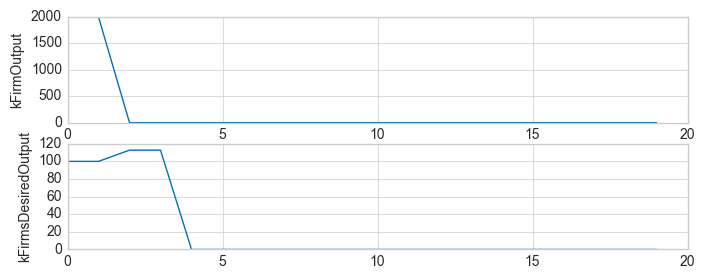

In [59]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,3))

ax1.plot(kFirmOutput.index[START:PERIODEND], kFirmOutput[START:PERIODEND])
ax1.set_ylabel('kFirmOutput')
ax2.plot(kFirmsDesiredOutput.index[START:PERIODEND], kFirmsDesiredOutput[START:PERIODEND])
ax2.set_ylabel('kFirmsDesiredOutput')

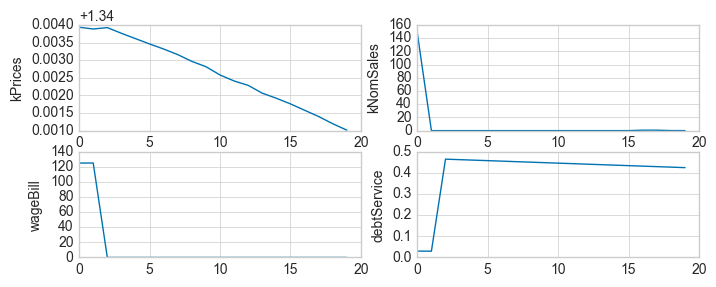

In [51]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,3))

ax1.plot(kPrices.index[START:PERIODEND], kPrices[START:PERIODEND])
ax1.set_ylabel('kPrices')
ax2.plot(kNomSales.index[START:PERIODEND], kNomSales[START:PERIODEND])
ax2.set_ylabel('kNomSales')
ax3.plot(kWages.index[START:PERIODEND], kWages[START:PERIODEND])
ax3.set_ylabel('wageBill')
ax4.plot(kDebtService.index[START:PERIODEND], kDebtService[START:PERIODEND])
ax4.set_ylabel('debtService')

# 4 Banks

## 4.1 Interest rates

In [60]:
banksLoanInterestRate = averageMicroData(allRuns('banksLoanInterestRate'),1)
banksDepAvInterest = averageMicroData(allRuns('banksDepAvInterest'),1)

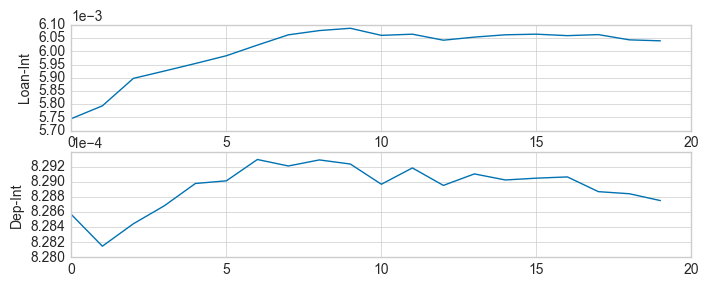

In [67]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,3))

ax1.plot(banksLoanInterestRate.index[START:PERIODEND], banksLoanInterestRate[START:PERIODEND])
ax1.set_ylabel('Loan-Int')
ax2.plot(banksDepAvInterest.index[START:PERIODEND], banksDepAvInterest[START:PERIODEND])
ax2.set_ylabel('Dep-Int')

for ax in (ax1, ax2):
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

## 4.2 Profitability

In [69]:
banksProfits = aggregateMicroData(allRuns('banksProfits'),1)
banksTotalCredit = aggregateMicroData(allRuns('banksTotalCredit'),1)
banksTaxes = aggregateMicroData(allRuns('banksTaxes'),1)
banksBankrupcty = allRuns('banksBankrupcty')
banksLossBadDebt = aggregateMicroData(allRuns('banksLossBadDebt'),1)

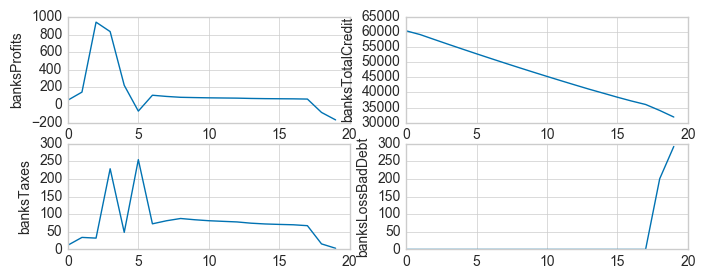

In [70]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,3))

ax1.plot(banksProfits.index[START:PERIODEND], banksProfits[START:PERIODEND])
ax1.set_ylabel('banksProfits')
ax2.plot(banksTotalCredit.index[START:PERIODEND], banksTotalCredit[START:PERIODEND])
ax2.set_ylabel('banksTotalCredit')
ax3.plot(banksTaxes.index[START:PERIODEND], banksTaxes[START:PERIODEND])
ax3.set_ylabel('banksTaxes')
ax4.plot(banksLossBadDebt.index[START:PERIODEND], banksLossBadDebt[START:PERIODEND])
ax4.set_ylabel('banksLossBadDebt')

## 4.3 Capital and liquidity

In [61]:
banksCapitalRatio = averageMicroData(allRuns('banksCapitalRatio'),1)
banksLiquidityRatio = averageMicroData(allRuns('banksLiquidityRatio'),1)

In [72]:
microBanksTargtedCR = allRuns('microBanksTargtedCR')
microBanksTargtedLR = allRuns('microBanksTargtedLR')

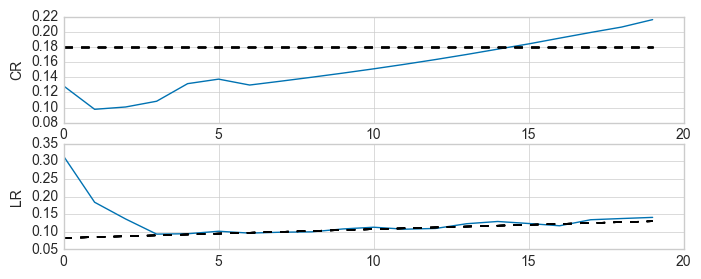

In [73]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,3))

ax1.plot(banksCapitalRatio.index[START:PERIODEND], banksCapitalRatio[START:PERIODEND])
ax1.plot(microBanksTargtedCR.index[START:PERIODEND], microBanksTargtedCR[START:PERIODEND], 'k--', label='Required')
ax1.set_ylabel('CR')
ax2.plot(banksLiquidityRatio.index[START:PERIODEND], banksLiquidityRatio[START:PERIODEND])
ax2.plot(microBanksTargtedLR.index[START:PERIODEND], microBanksTargtedLR[START:PERIODEND], 'k--', label='Required')
ax2.set_ylabel('LR')

for ax in (ax1, ax2):
    ax.ticklabel_format(axis='y', style='sci', scilimits=(-2,2))

## 4.4 Interbank market

In [74]:
microCBAdvancesRate = allRuns('microCBAdvancesRate')
microCBBankRate = allRuns('microCBBankRate')
microInterbankRate = averageMicroData(allRuns('microInterbankRate'),1)
microInterbankSupply = aggregateMicroData(allRuns('microInterbankSupply'),1)
microInterbankDemand = aggregateMicroData(allRuns('microInterbankDemand'),1)
microTotalInterBankCreditObtained = aggregateMicroData(allRuns('microTotalInterBankCreditObtained'),1)

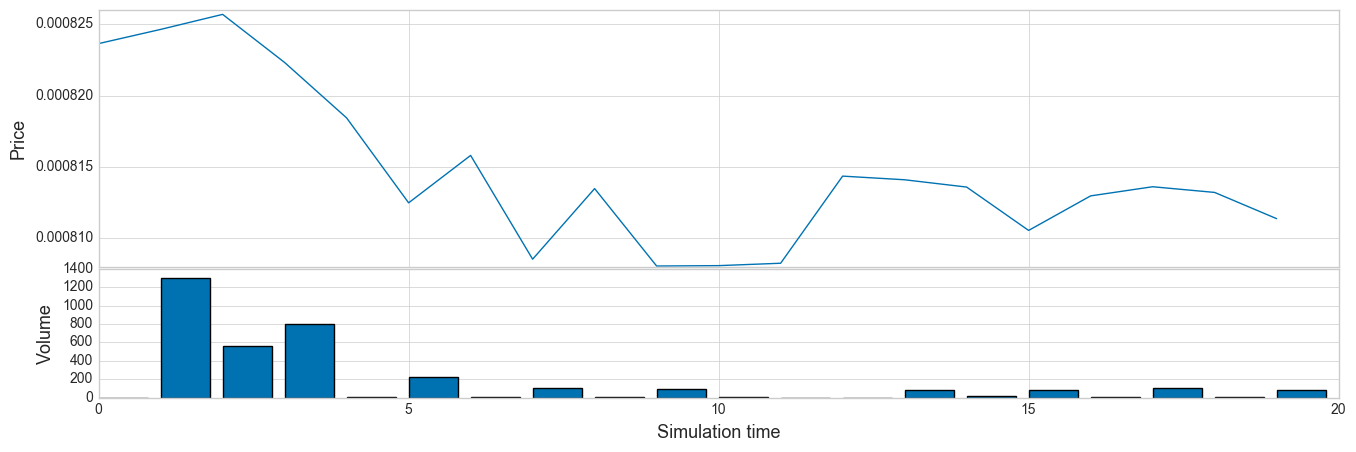

In [110]:
# Three subplots sharing both x/y axes
#fig, ((ax1, ax2)) = plt.subplots(2, figsize=(6, 6), sharex=True,gridspec_kw={'height_ratios':[2,1]})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,5), sharex=True, gridspec_kw={'height_ratios':[2,1]})

ax1.plot(microInterbankRate.index[START:PERIODEND], microInterbankRate[START:PERIODEND])
#ax1.plot(microCBAdvancesRate.index[START:PERIODEND], microCBAdvancesRate[START:PERIODEND], 'k--')
#ax1.plot(microCBBankRate.index[START:PERIODEND], microCBBankRate[START:PERIODEND], 'k--')

ax2.bar(microTotalInterBankCreditObtained.index[START:PERIODEND], microTotalInterBankCreditObtained[START:PERIODEND]['agg-1-'].apply(int))
#ax2.scatter(microInterbankSupply.index[START:PERIODEND], microInterbankSupply[START:PERIODEND]['agg-1-'].apply(int))
#ax2.scatter(microInterbankDemand.index[START:PERIODEND], microInterbankDemand[START:PERIODEND]['agg-1-'].apply(int))

ax2.set_xlabel('Simulation time', fontsize='13')    

ax1.set_ylabel('Price', fontsize='13')
ax2.set_ylabel('Volume', fontsize='13')
    
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
fig.subplots_adjust(hspace=0.01)

#ax1.legend(frameon=True, loc='best')

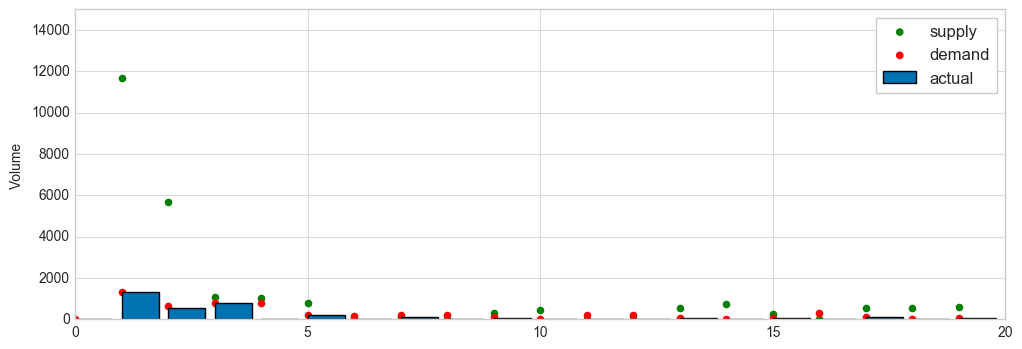

In [109]:
fig, ax1 = plt.subplots(1, 1, figsize=(12,4))

ax1.set_ylabel('Volume')
ax1.set_xlim(START, PERIODEND)
ax1.set_ylim(0, 15000)

ax1.bar(microTotalInterBankCreditObtained.index[START:PERIODEND], microTotalInterBankCreditObtained[START:PERIODEND]['agg-1-'].apply(int), label='actual')
ax1.scatter(microInterbankSupply.index[START:PERIODEND], microInterbankSupply[START:PERIODEND]['agg-1-'].apply(int), color='green', label='supply')
ax1.scatter(microInterbankDemand.index[START:PERIODEND], microInterbankDemand[START:PERIODEND]['agg-1-'].apply(int), color='red', label='demand')

ax1.legend(frameon=True, loc='best')

## 4.5 Deposit market 

In [ ]:
DepIntRate + 

## 4.6 Credit market

In [136]:
# 1 . loan intRate
# 2. Credit obtained / Credit constrained? 
kCreditObtained = aggregateMicroData(allRuns('kCreditObtained'), 1)
cCreditObtained = aggregateMicroData(allRuns('cFirmsCreditObtained'), 1)

kCreditObtained1.csv
cFirmsCreditObtained1.csv


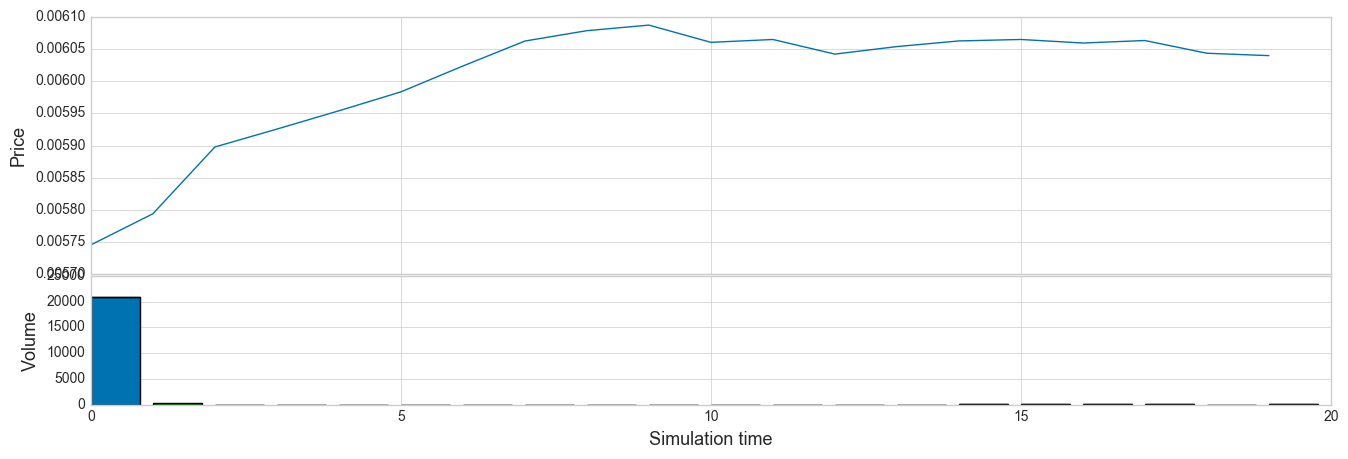

In [137]:
# Three subplots sharing both x/y axes
#fig, ((ax1, ax2)) = plt.subplots(2, figsize=(6, 6), sharex=True,gridspec_kw={'height_ratios':[2,1]})
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,5), sharex=True, gridspec_kw={'height_ratios':[2,1]})

ax1.plot(banksLoanInterestRate.index[START:PERIODEND], banksLoanInterestRate[START:PERIODEND])

ax2.bar(cCreditObtained.index[START:PERIODEND], cCreditObtained[START:PERIODEND]['agg-1-'].apply(int), label='cCredit')
ax2.bar(kCreditObtained.index[START:PERIODEND], kCreditObtained[START:PERIODEND]['agg-1-'].apply(int), 
        bottom=cCreditObtained[START:PERIODEND]['agg-1-'].apply(int), color='g', label='kCredit')

ax2.set_xlabel('Simulation time', fontsize='13')    

ax1.set_ylabel('Price', fontsize='13')
ax2.set_ylabel('Volume', fontsize='13')
    
# Fine-tune figure; make subplots close to each other and hide x ticks for
# all but bottom plot.
fig.subplots_adjust(hspace=0.01)

#ax1.legend(frameon=True, loc='best')